[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\trudy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               title  \
0  Huge earnings week on tap, led by tech titans ...   
1  Dow Jones Futures Loom As Microsoft, Apple Lea...   
2  US Earnings Week Ahead: From Alphabet, Meta to...   
3  Apple Car Pushed Back To 2028. Autonomous Driv...   
4  Apple gains top position in China smartphone m...   

                       media         date                   datetime desc  \
0                  TheStreet   0 mins ago 2024-01-28 15:52:33.773215        
1  Investor's Business Daily   1 hour ago 2024-01-28 14:52:33.782838        
2                       Mint   1 hour ago 2024-01-28 14:52:33.790888        
3              CleanTechnica  2 hours ago 2024-01-28 13:52:33.798839        
4             Times of India  2 hours ago 2024-01-28 13:52:33.805891        

                                                link  \
0  https://www.thestreet.com/investing/stocks/big...   
1  https://www.investors.com/market-trend/stock-m...   
2  https://www.livemint.com/comp

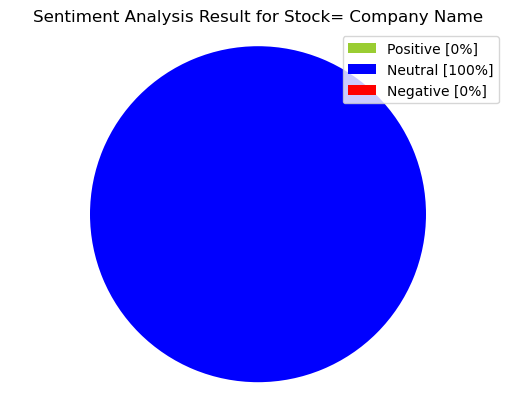

In [8]:
# Importing necessary tools
from pandas import DataFrame 
from GoogleNews import GoogleNews
from datetime import date, timedelta

import nltk
nltk.download('vader_lexicon')

# Extracting news for a specific company
now = date.today()
yesterday = date.today() - timedelta(days=1)
google_news = GoogleNews(start="31-02-2022", end=now)
google_news.search("Apple")
result = google_news.result()
df = DataFrame(result)
print(df.head())

# Code snippet for summarizing articles
from newspaper import article, Article, Config

# Creating an empty list
article_list = [] 

# Iterating over the dataframe
for i in df.index:
    article_dict = {} 
    article_obj = Article(df['link'][i], config=Config())
    
    try:
        article_obj.download()
        article_obj.parse()
        article_obj.nlp()
    except:
        pass 
    
    # Storing results in the dictionary
    article_dict['Date'] = df['date'][i] 
    article_dict['Media'] = df['media'][i]
    article_dict['Title'] = article_obj.title
    article_dict['Article'] = article_obj.text
    article_dict['Summary'] = article_obj.summary
    article_dict['Key_words'] = article_obj.keywords
    article_list.append(article_dict)

# Creating a dataframe
news_df = DataFrame(article_list)
print(news_df)

# Code snippet for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initializing variables
positive = 0
negative = 0
neutral = 0
news_list = []
neutral_list = []
negative_list = []
positive_list = []

# Initializing the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Iterating over the news summaries
for news in news_df['Summary']:
    news_list.append(news)
    scores = analyzer.polarity_scores(news)
    
    compound_score = scores['compound']
    
    if compound_score >= 0.05:
        positive_list.append(news)
        positive += 1
    elif compound_score <= -0.05:
        negative_list.append(news)
        negative += 1
    else:
        neutral_list.append(news)
        neutral += 1

positive_percentage = (positive / len(news_df)) * 100
negative_percentage = (negative / len(news_df)) * 100
neutral_percentage = (neutral / len(news_df)) * 100

print("Positive Sentiment:", '%.2f' % positive_percentage, end='\n')
print("Neutral Sentiment:", '%.2f' % neutral_percentage, end='\n')
print("Negative Sentiment:", '%.2f' % negative_percentage, end='\n')

# Code snippet for sentiment visualization
import matplotlib.pyplot as plt

labels = ['Positive ['+str(round(positive_percentage))+'%]' , 'Neutral ['+str(round(neutral_percentage))+'%]','Negative ['+str(round(negative_percentage))+'%]']
sizes = [positive_percentage, neutral_percentage, negative_percentage]
colors = ['yellowgreen', 'blue','red']
plt.pie(sizes, colors=colors, startangle=90)
plt.legend(labels)
plt.title("Sentiment Analysis Result for Stock= Company Name" )
plt.axis('equal')
plt.show()
